## Wolrdwide Oil/Gasoline Price and Consumption

### Introduction

Dataset contains world share of petrol consumption by country, price per gallon, price per litter and the corresponding price in Pakistan Rupee (Conversion rate 1USD = 211.5PKR)

In this simple analysis, I am going to find out:
 
 1.Which country is the most consumpted gasoline?
 
 2.The proprtion of consumption of each country.
 
 3.Is there a different in price among contries?
 

### Loading dataset and Data Cleaning

In [157]:
#Loading Libraries
import numpy as np
import pandas as pd
#import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from statsmodels.tsa.seasonal import seasonal_decompose

In [158]:
gas_raw = pd.read_csv("Petrol_Dataset _June _20 _2022.csv",encoding='latin-1')

In [159]:
#Drop the first column
gas_raw  = gas_raw .drop(gas_raw .columns[0],axis=1)
gas_raw .head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,Russia,3631287,3.70%,383.2,3.41,0.90,190.56


In [160]:
gas_raw .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          181 non-null    object 
 1   Daily Oil Consumption (Barrels)  181 non-null    int64  
 2   World Share                      181 non-null    object 
 3   Yearly Gallons Per Capita        181 non-null    float64
 4   Price Per Gallon (USD)           181 non-null    float64
 5   Price Per Liter (USD)            181 non-null    float64
 6   Price Per Liter (PKR)            181 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.0+ KB


In [161]:
# checking missing values:
print(gas_raw .isna().sum())

# checking duplucated values:
print(gas_raw .duplicated().sum())

Country                            0
Daily Oil Consumption (Barrels)    0
World Share                        0
Yearly Gallons Per Capita          0
Price Per Gallon (USD)             0
Price Per Liter (USD)              0
Price Per Liter (PKR)              0
dtype: int64
0


### Data Analysis and Visualization

#### Top 20 Most Consumpted Petrol Countries 

In [162]:
#Petrol Consumption
avg_gas_consumption = gas_raw.loc[:,'Daily Oil Consumption (Barrels)'].mean()
top_20_petrol_consumption = gas_raw.sort_values('Daily Oil Consumption (Barrels)', ascending = False).head(20)
top_20_petrol_consumption

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97
1,China,12791553,13.20%,138.7,5.42,1.43,302.87
2,India,4443000,4.60%,51.4,5.05,1.33,281.93
3,Japan,4012877,4.10%,481.5,4.69,1.24,262.05
4,Russia,3631287,3.70%,383.2,3.41,0.90,190.56
5,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34
6,Brazil,2984000,3.10%,221.9,5.36,1.42,299.27
7,South Korea,2605440,2.70%,783.4,6.09,1.61,340.52
8,Canada,2486301,2.60%,1047.6,6.76,1.79,377.74
9,Germany,2383393,2.50%,444.5,7.65,2.02,427.44


Text(57, 1.5, 'Overall Average:\n533573.05')

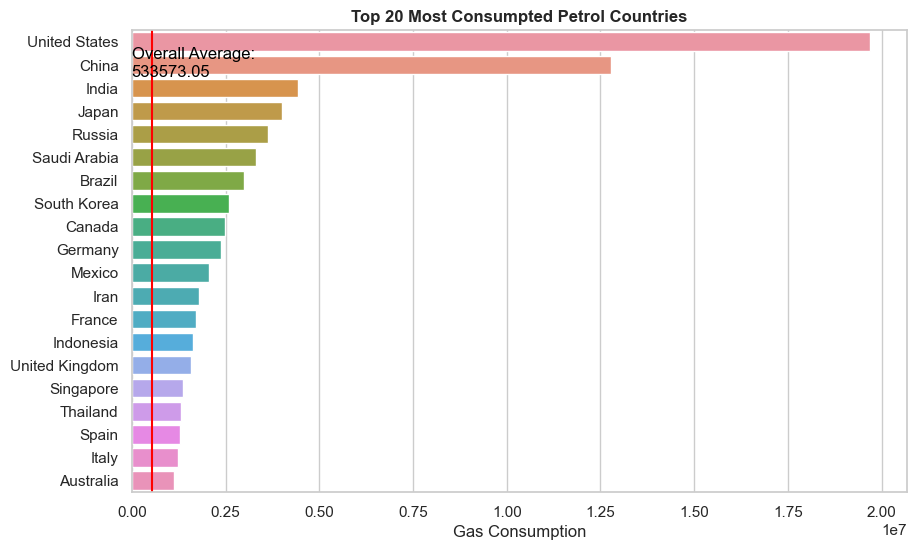

In [163]:
plt.figure(figsize = (10,6))
sns.set_theme(style='whitegrid')
y =  top_20_petrol_consumption['Country']
ax2 = sns.barplot(x = 'Daily Oil Consumption (Barrels)', y= y, data=top_20_petrol_consumption)
ax2.set_title("Top 20 Most Consumpted Petrol Countries", fontweight="bold")
ax2.axvline(x = avg_gas_consumption, ymin = 0, ymax = 100, color = "red")
ax2.set_xlabel("Gas Consumption")
ax2.set_ylabel("")
ax2.text(x = 57, y = 1.5, s = "Overall Average:\n{}".format(round(avg_gas_consumption, 2)), color = "black")

In [164]:
#Top 20 Countries: Yearly Gallons per Capita
avg_yearly_per_capita = gas_raw .loc[:,'Yearly Gallons Per Capita'].mean()
top_20_yearly_per_capita = gas_raw.sort_values('Yearly Gallons Per Capita', ascending = False).head(20)
top_20_yearly_per_capita

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
15,Singapore,1357000,1.40%,3679.5,8.71,2.30,486.87
176,Saint Pierre & Miquelon,660,0.00%,1705.1,8.27,2.19,462.13
106,Malta,47000,0.05%,1652.2,5.28,1.40,295.04
5,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34
94,Luxembourg,56194,0.06%,1487.2,7.91,2.09,441.82
25,United Arab Emirates,896000,0.90%,1467.3,4.15,1.10,232.02
40,Kuwait,359000,0.40%,1390.9,1.29,0.34,72.33
178,Montserrat,400,0.00%,1231.1,4.57,1.21,255.07
154,Aruba,8000,0.01%,1169.4,6.08,1.61,339.67
155,Seychelles,7299,0.01%,1169.1,6.90,1.82,385.35


Text(57, 1.5, 'Overall Average:\n332.01')

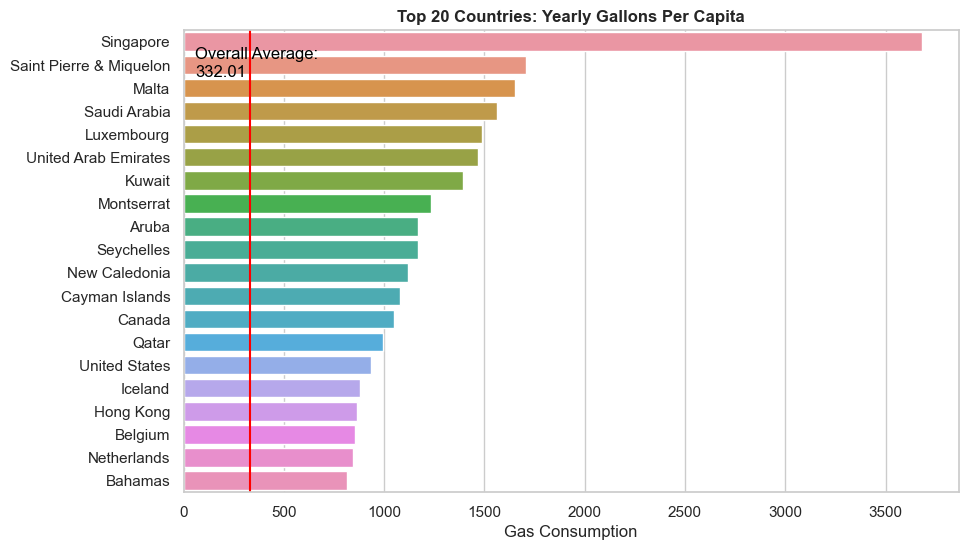

In [165]:
plt.figure(figsize = (10,6))
sns.set_theme(style='whitegrid')
y =  top_20_yearly_per_capita['Country']
ax2 = sns.barplot(x = 'Yearly Gallons Per Capita', y= y, data=top_20_yearly_per_capita)
ax2.set_title('Top 20 Countries: Yearly Gallons Per Capita', fontweight="bold")
ax2.axvline(x = avg_yearly_per_capita, ymin = 0, ymax = 100, color = "red")
ax2.set_xlabel("Gas Consumption")
ax2.set_ylabel("")
ax2.text(x = 57, y = 1.5, s = "Overall Average:\n{}".format(round(avg_yearly_per_capita, 2)), color = "black")

In [166]:
merged_data = pd.merge(top_20_petrol_consumption, top_20_yearly_per_capita, on=['Country'], how='inner')
merged_data

,Country,Daily Oil Consumption (Barrels)_x,World Share_x,Yearly Gallons Per Capita_x,Price Per Gallon (USD)_x,Price Per Liter (USD)_x,Price Per Liter (PKR)_x,Daily Oil Consumption (Barrels)_y,World Share_y,Yearly Gallons Per Capita_y,Price Per Gallon (USD)_y,Price Per Liter (USD)_y,Price Per Liter (PKR)_y
0,United States,19687287,20.30%,934.3,5.19,1.37,289.97,19687287,20.30%,934.3,5.19,1.37,289.97
1,Saudi Arabia,3302000,3.40%,1560.2,2.35,0.62,131.34,3302000,3.40%,1560.2,2.35,0.62,131.34
2,Canada,2486301,2.60%,1047.6,6.76,1.79,377.74,2486301,2.60%,1047.6,6.76,1.79,377.74
3,Singapore,1357000,1.40%,3679.5,8.71,2.30,486.87,1357000,1.40%,3679.5,8.71,2.30,486.87


These two graphs above show that :
  1. United States has the highest Daily Oil consumtion. However,Its Yearly gallons per capita is quite low.
  2. Singapore holds the highest Yearly Gallons Per Capita.
  3. Only 4 countries on the top 20 Daily Oil Consumer appear on the Yearly Gallons Per Capita graph.

#### Pie chart propotions of Oil consumer

array([<AxesSubplot:ylabel='Daily Oil Consumption (Barrels)'>],
      dtype=object)

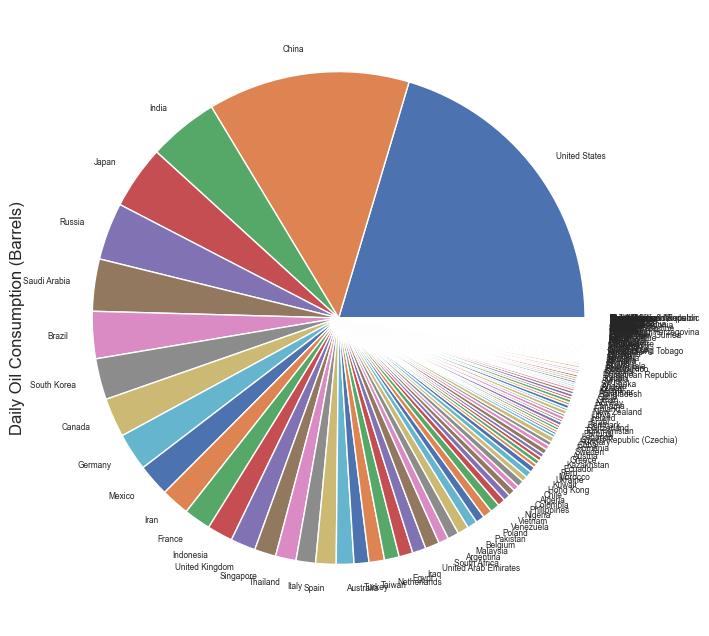

In [167]:
gas_raw['Daily Oil Consumption (Barrels)'].plot(kind='pie', subplots=True,labels=gas_raw['Country'], 
                                                legend = False, fontsize=6, figsize=(16,8))

#### Compare Price per Gallon (in USD)

In [168]:
avg_price_per_Gallon = gas_raw.loc[:,'Price Per Gallon (USD)'].mean()
top_20_highest_price = gas_raw.sort_values('Price Per Gallon (USD)', ascending = False).head(20)
top_20_highest_price

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
139,North Korea,18000,0.02%,10.9,54.89,14.50,3066.75
175,Tonga,899,0.00%,136.3,16.20,4.28,905.22
180,Niue,51,0.00%,484.4,11.43,3.02,638.73
39,Hong Kong,408491,0.40%,864.5,11.35,3.00,634.29
64,Norway,204090,0.20%,595.8,10.22,2.70,571.26
57,Denmark,158194,0.20%,424.6,10.04,2.65,561.11
62,Finland,210030,0.20%,585.7,10.01,2.64,559.21
138,Iceland,19090,0.02%,880.9,9.83,2.60,549.48
46,Greece,296101,0.30%,427.6,9.49,2.51,530.02
22,Netherlands,937098,1.00%,846.0,9.33,2.47,521.35


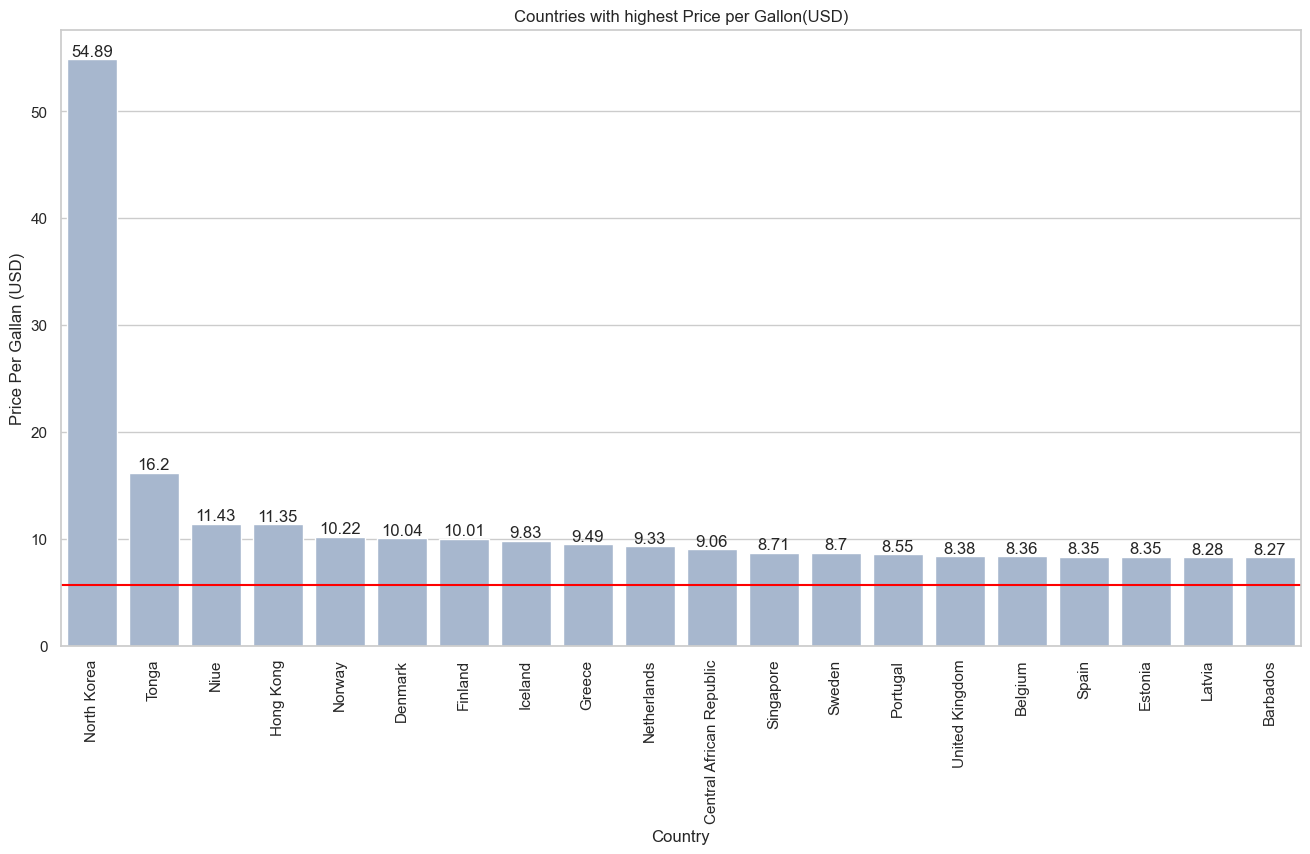

In [169]:
plt.figure(figsize=(16,8))
plt.title('Countries with highest Price per Gallon(USD)')
ax = sns.barplot(x = 'Country', y = 'Price Per Gallon (USD)', data = top_20_highest_price, color='#A1B6D4')
ax.axhline(y = avg_price_per_Gallon, xmin = 0, xmax = 100, color = "red")
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Price Per Gallan (USD)')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

#### Compare Price per Liter (in USD)

In [170]:
avg_price_per_Liter = gas_raw.loc[:,'Price Per Liter (USD)'].mean()
top_20_highest_price_per_liter = gas_raw.sort_values('Price Per Liter (USD)', ascending = False).head(20)
top_20_highest_price_per_liter.head()

,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
139,North Korea,18000,0.02%,10.9,54.89,14.50,3066.75
175,Tonga,899,0.00%,136.3,16.20,4.28,905.22
180,Niue,51,0.00%,484.4,11.43,3.02,638.73
39,Hong Kong,408491,0.40%,864.5,11.35,3.00,634.29
64,Norway,204090,0.20%,595.8,10.22,2.70,571.26


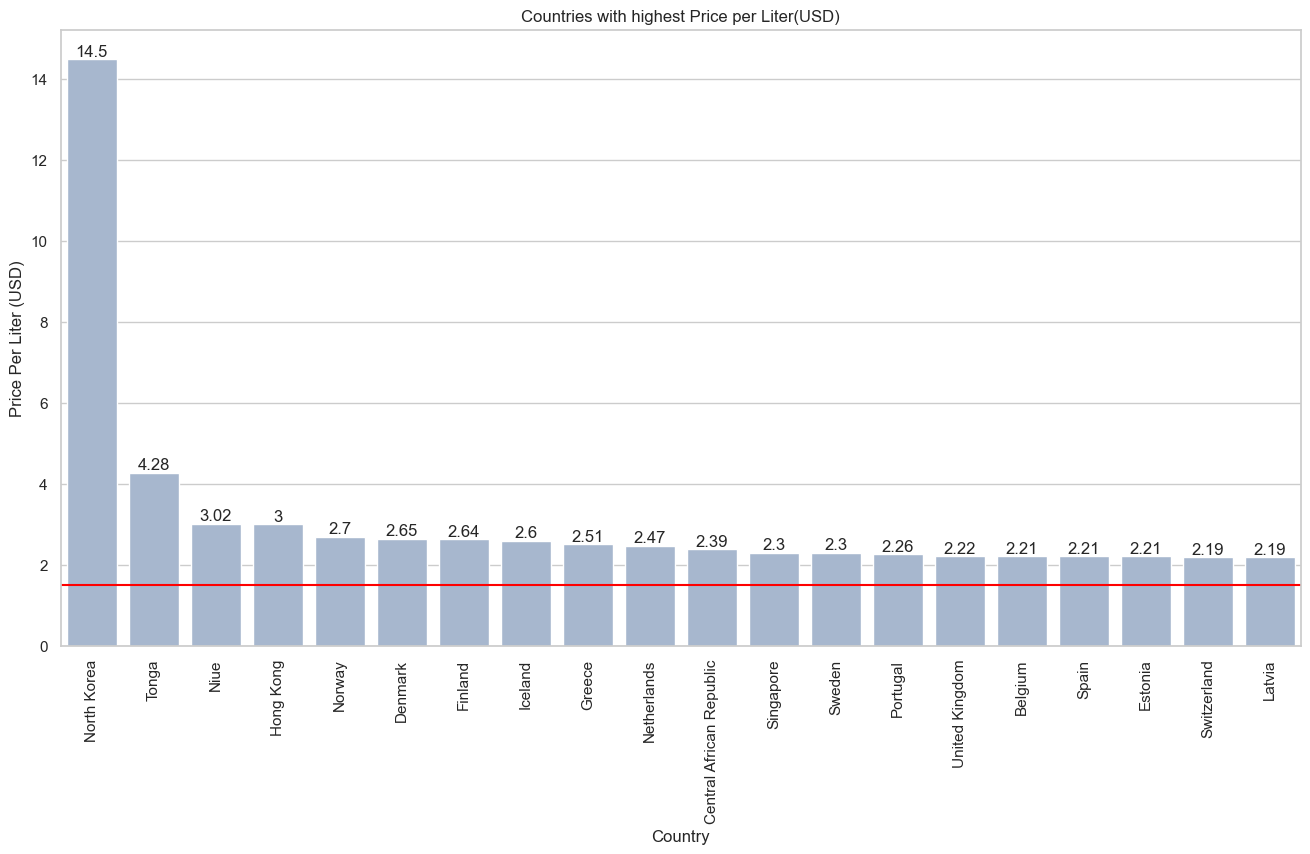

In [171]:
plt.figure(figsize=(16,8))
plt.title('Countries with highest Price per Liter(USD)')
ax = sns.barplot(x = 'Country', y = 'Price Per Liter (USD)', data = top_20_highest_price_per_liter, color='#A1B6D4')
ax.axhline(y = avg_price_per_Liter, xmin = 0, xmax = 100, color = "red")
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Price Per Liter (USD)')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [172]:
merged_data2 = pd.merge(top_20_highest_price, top_20_highest_price_per_liter, on=['Country'], how='inner')
merged_data2

,Country,Daily Oil Consumption (Barrels)_x,World Share_x,Yearly Gallons Per Capita_x,Price Per Gallon (USD)_x,Price Per Liter (USD)_x,Price Per Liter (PKR)_x,Daily Oil Consumption (Barrels)_y,World Share_y,Yearly Gallons Per Capita_y,Price Per Gallon (USD)_y,Price Per Liter (USD)_y,Price Per Liter (PKR)_y
0,North Korea,18000,0.02%,10.9,54.89,14.50,3066.75,18000,0.02%,10.9,54.89,14.50,3066.75
1,Tonga,899,0.00%,136.3,16.20,4.28,905.22,899,0.00%,136.3,16.20,4.28,905.22
2,Niue,51,0.00%,484.4,11.43,3.02,638.73,51,0.00%,484.4,11.43,3.02,638.73
3,Hong Kong,408491,0.40%,864.5,11.35,3.00,634.29,408491,0.40%,864.5,11.35,3.00,634.29
4,Norway,204090,0.20%,595.8,10.22,2.70,571.26,204090,0.20%,595.8,10.22,2.70,571.26
5,Denmark,158194,0.20%,424.6,10.04,2.65,561.11,158194,0.20%,424.6,10.04,2.65,561.11
6,Finland,210030,0.20%,585.7,10.01,2.64,559.21,210030,0.20%,585.7,10.01,2.64,559.21
7,Iceland,19090,0.02%,880.9,9.83,2.60,549.48,19090,0.02%,880.9,9.83,2.60,549.48
8,Greece,296101,0.30%,427.6,9.49,2.51,530.02,296101,0.30%,427.6,9.49,2.51,530.02
9,Netherlands,937098,1.00%,846.0,9.33,2.47,521.35,937098,1.00%,846.0,9.33,2.47,521.35


As we expected 19 out of 20 countries have the high price per Gallon also have the high price for each liter.